<a href="https://colab.research.google.com/github/VorobyvEgor/Seminar_Sber/blob/main/Projects/%D0%95%D0%B3%D0%BE%D1%80_%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2_%5BTemplate%5D_%D0%93%D1%80%D1%83%D0%BF%D0%BF%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82__%D0%9F%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 
plt.rcParams['figure.figsize'] = [13, 8]

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии (**N декабря в M часов**).  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1IJRb8SGiHm2BnjQ-MJXXFrzzjCUf1FhCCG6QDHDPin0/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите мне (@azukhba). 


## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1jN8W_OQWm2Wryvn6rrSm58no679X_be_/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data.csv


In [4]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("netflix_data.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data.shape

(1000, 5)

In [ ]:
data.sample(10)

,title,rating,ratingLevel,release year,user rating score
90,Sausage Party,R,"strong crude sexual content, pervasive languag...",2016,91.0
846,The Land Before Time XIV: Journey of the Brave,G,General Audiences. Suitable for all ages.,2016,NaN
833,Octonauts,TV-Y,Suitable for all ages.,2015,NaN
895,Alice Through the Looking Glass,PG,fantasy action/peril and some language,2016,96.0
526,LEGO: Marvel Super Heroes: Maximum Overload,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2013,NaN
310,Law & Order: Special Victims Unit,TV-14,Parents strongly cautioned. May be unsuitable ...,2015,97.0
533,Kong: King of the Apes,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2016,NaN
248,Cheer Squad,TV-PG,NaN,2016,61.0
736,Zootopia,PG,"some thematic elements, rude humor and action",2016,97.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0


## Удалите из данных дупликаты. 

In [5]:
data.drop_duplicates(subset='title',inplace=True)

In [6]:
data.reset_index(drop=True, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              496 non-null    object 
 1   rating             496 non-null    object 
 2   ratingLevel        464 non-null    object 
 3   release year       496 non-null    int64  
 4   user rating score  254 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.5+ KB


## Заполнение пропусков

Дупликаты удалили, но осталась еще однва проблема, сколько у нас пропущенных данных в колонке user rating score!! 

Предлагаю заполнить эти данные, потому что иначе мы теряем почти половину данных с рейтингами пользователей, а это довольно важная колонка.

Один из выриантов заполнить дупликаты средним/медианой для каждого rating. То есть заменять пропущенные значения, средним/медианой той группы, к которой относится шоу. 

In [29]:
data.groupby('rating').agg(user_rating_count=('user rating score', 'count'), all_count=('title', 'count'))

,user_rating_count,all_count
rating,,
G,19,53
NR,2,10
PG,47,75
PG-13,9,12
R,7,14
TV-14,77,106
TV-G,11,29
TV-MA,40,80
TV-PG,20,32


In [30]:
rating = data['rating'].unique()
rating = np.delete(rating, np.where(rating == 'UR')[0])
rating.size

12

In [31]:
data[data['rating'] == 'UR']

,title,rating,ratingLevel,release year,user rating score
38,White Girl,UR,This movie has not been rated. Intended for ad...,2016,NaN


In [32]:
rating = rating.reshape(4, 3)

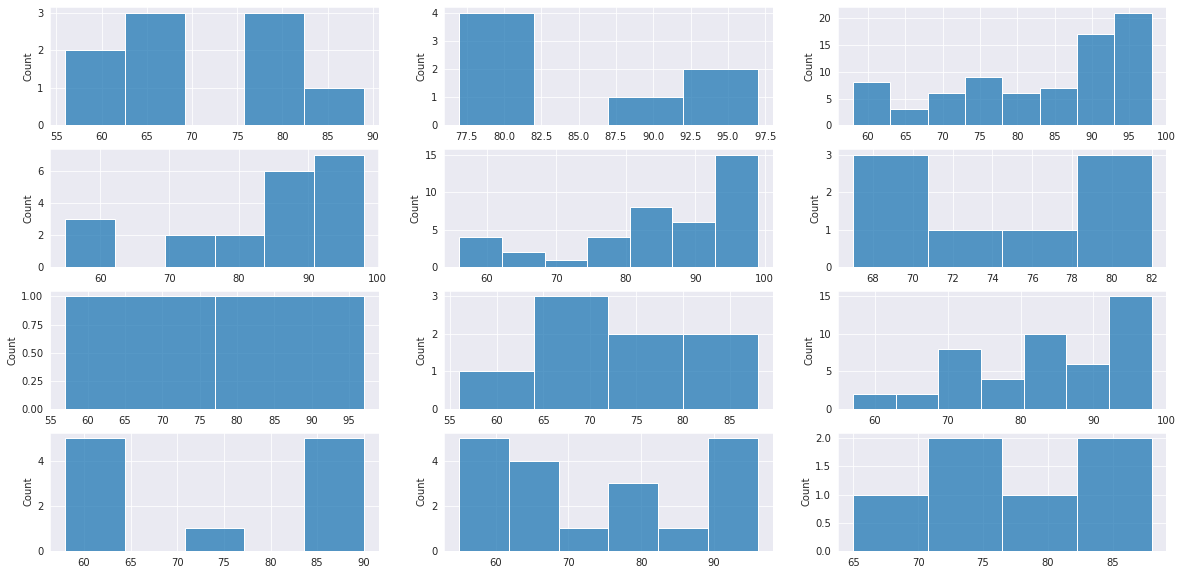

In [33]:
fig, ax = plt.subplots(nrows = 4, ncols=3, figsize=(20, 10))
for row in range(4):
  for col in range(3):
    sns.histplot(data[data['rating'] == rating[row][col]]['user rating score'], ax=ax[row][col])
    ax[row][col].set_xlabel(None)

In [34]:
stat_rating = data[data['rating'] != 'UR'].groupby('rating').agg(mean=('user rating score', 'mean'), median=('user rating score', 'median'))

In [35]:
stat_rating

,mean,median
rating,,
G,74.421053,70.0
NR,77.000000,77.0
PG,83.978723,86.0
PG-13,71.444444,68.0
R,85.285714,79.0
TV-14,82.870130,86.0
TV-G,74.363636,74.0
TV-MA,84.825000,89.0
TV-PG,83.350000,87.0


Text(0, 0.5, 'Значение')

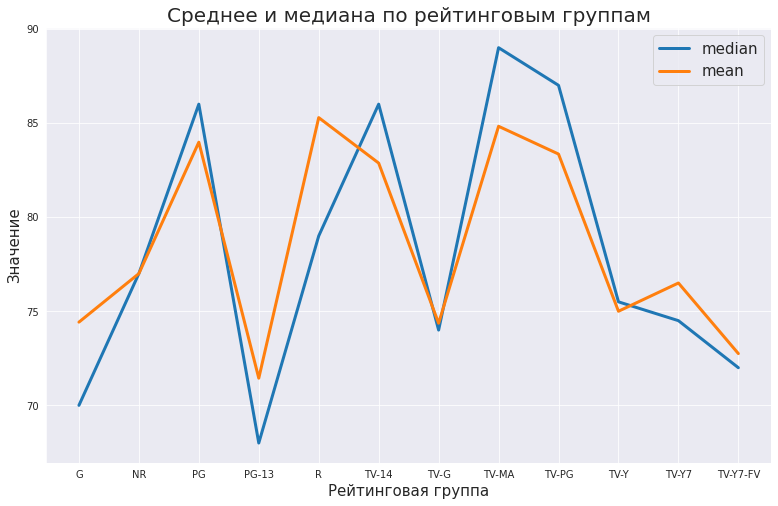

In [36]:
sns.set_style("darkgrid")
sns.lineplot(y=stat_rating['median'], x=stat_rating.index, lw=3)
sns.lineplot(y=stat_rating['mean'], x=stat_rating.index, lw=3)
plt.legend(labels=['median', 'mean'], fontsize=15);
plt.title('Среднее и медиана по рейтинговым группам', fontdict={'fontsize': 20, 'fontweight':10})
plt.xlabel('Рейтинговая группа', fontdict={'fontsize': 15, 'fontweight':10})
plt.ylabel('Значение', fontdict={'fontsize': 15, 'fontweight':10})

In [37]:
from numpy.core.numeric import full
full_score = pd.Series(dtype='float64')
for rat in data[data['rating'] != 'UR']['rating'].unique():
  prom = data[data['rating'] == rat]['user rating score'].fillna(stat_rating.loc[rat]['median'])
  full_score = full_score.append(prom)
full_score = full_score.append(pd.Series(full_score.median(), index=[38]))
full_score.sort_index(inplace=True)

In [38]:
data.head(10)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


In [39]:
data_full = data.copy()
data_full['user rating score'] = full_score

In [40]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              496 non-null    object 
 1   rating             496 non-null    object 
 2   ratingLevel        464 non-null    object 
 3   release year       496 non-null    int64  
 4   user rating score  496 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.5+ KB


In [41]:
data_full.head(10)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,79.0
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


## Сколько рейтинговых групп представлено в данных?

In [ ]:
data_full.rating.nunique()

13

## Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

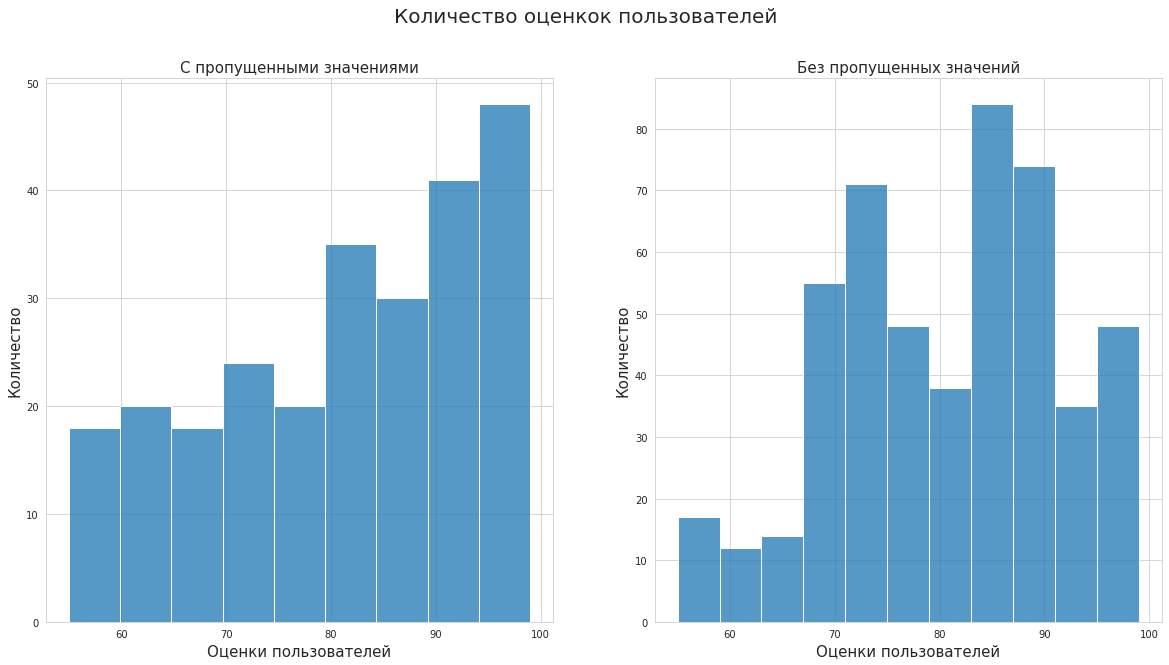

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(x='user rating score', data=data, ax=ax[0])
sns.histplot(x='user rating score', data=data_full, ax=ax[1])

ax[0].set_title("С пропущенными значениями", fontdict={'fontsize': 15, 'fontweight':10})
ax[0].set_xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
ax[0].set_ylabel("Количество", fontdict={'fontsize': 15, 'fontweight':10})

ax[1].set_title("Без пропущенных значений", fontdict={'fontsize': 15, 'fontweight':10})
ax[1].set_xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
ax[1].set_ylabel("Количество", fontdict={'fontsize': 15, 'fontweight':10})

fig.suptitle("Количество оценкок пользователей", size=20);


In [ ]:
data_mean = data.copy()
data_mean['user rating score'].fillna(data_mean['user rating score'].mean(), inplace=True)

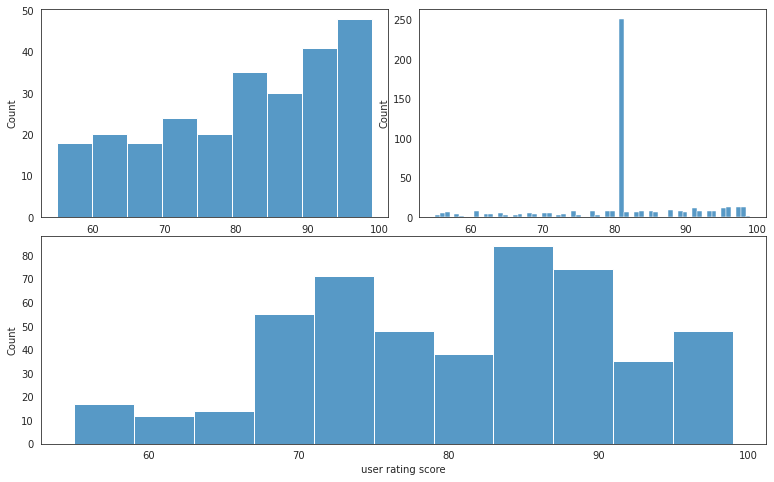

In [ ]:
plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
sns.histplot(x='user rating score', data=data)

plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
sns.histplot(x='user rating score', data=data_mean)

plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=4)
sns.histplot(x='user rating score', data=data_full)

# ax[0].set_title("С пропущенными значениями", fontdict={'fontsize': 15, 'fontweight':10})
# ax[0].set_xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
# ax[0].set_ylabel("Количество", fontdict={'fontsize': 15, 'fontweight':10})

# ax[1].set_title("Без пропущенных значений", fontdict={'fontsize': 15, 'fontweight':10})
# ax[1].set_xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
# ax[1].set_ylabel("Количество", fontdict={'fontsize': 15, 'fontweight':10})

# fig.suptitle("Количество оценкок пользователей", size=20);


In [ ]:
rating = data.groupby('user rating score').title.count()

Text(0.5, 1.0, 'Топ 10 оценок пользователей по количеству')

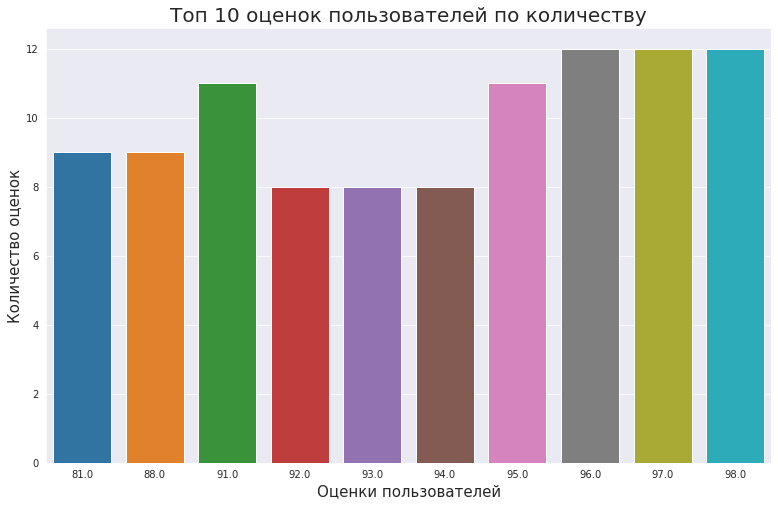

In [ ]:
top_rating = rating.sort_values(ascending=False).index[:10]
sns.countplot(x='user rating score', data=data[data['user rating score'].isin(top_rating)])
plt.xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
plt.ylabel('Количество оценок', fontdict={'fontsize': 15, 'fontweight':10})
plt.title('Топ 10 оценок пользователей по количеству', fontdict={'fontsize': 20, 'fontweight':10})

***Вывод:*** Можно сказать, что платформа Netflix успешна и выдает пользователю качественный контент, так как в топ 10 оценок нет оченок ниже 80. 

## Основная информация по оценкам пользователей

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data['user rating score'].describe()

count    254.000000
mean      81.318898
std       12.748583
min       55.000000
25%       71.000000
50%       83.000000
75%       92.750000
max       99.000000
Name: user rating score, dtype: float64

***Ответ:*** Значения не должны сильно различаться, так как закон распределения стремится к нормальному.

## В какие годы были запущены шоу, представленные в датасете?

In [ ]:
data['release year'].sort_values().unique()

array([1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

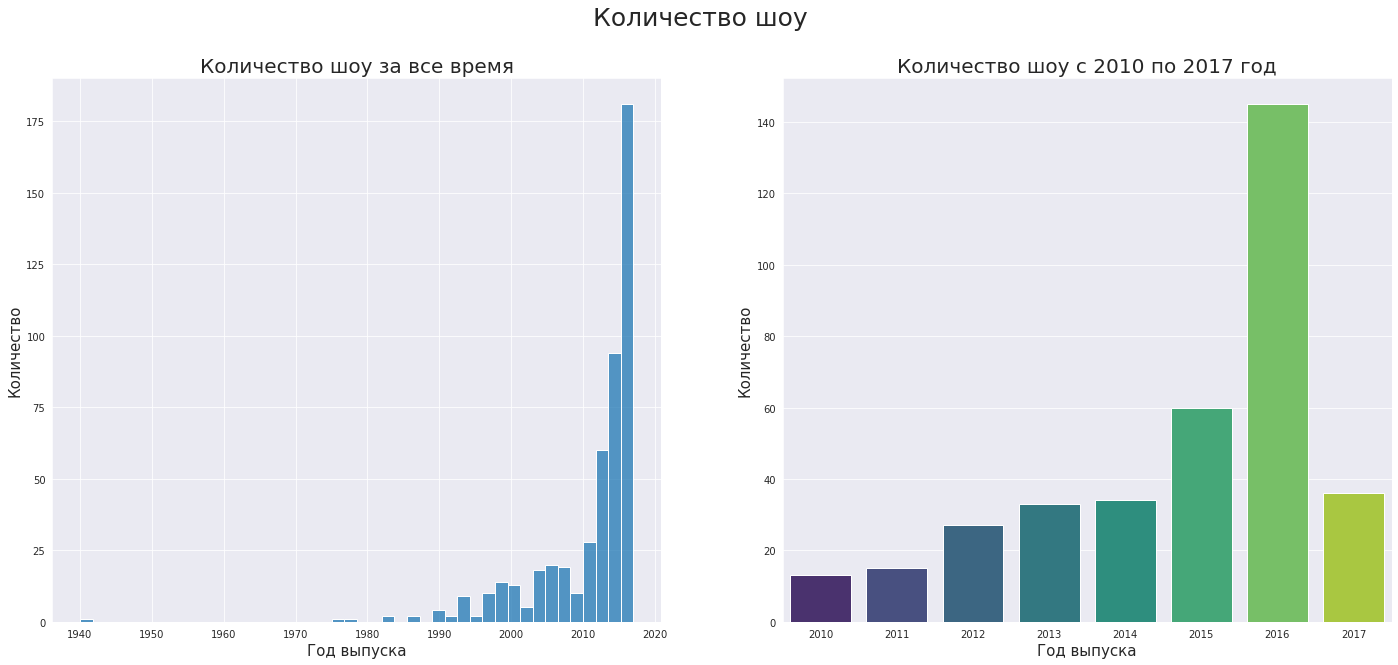

In [ ]:
fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=(24, 10))
sns.histplot(x='release year', data=data, ax=ax1[0])
sns.countplot(x='release year', data=data[data['release year'] >= 2010], palette="viridis", ax=ax1[1])
ax1[0].set_title("Количество шоу за все время", size=20)
ax1[0].set_xlabel("Год выпуска", size=15)
ax1[0].set_ylabel("Количество", size=15)

ax1[1].set_title("Количество шоу с 2010 по 2017 год", size=20)
ax1[1].set_xlabel("Год выпуска", size=15)
ax1[1].set_ylabel("Количество", size=15)

fig.suptitle("Количество шоу", size=25);

Теперь посмотрим на выброс.

In [ ]:
data[data['release year']==1940]

,title,rating,ratingLevel,release year,user rating score
408,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0


***Вывод:*** Значение можно считать выбросом, так как оно очень сильно отбросано по времени выхода и является единственным на промежутке в 40 лет. Его можно убрать из DataFrame.

Наблюдается рост количества шоу по годам, что логично.

## Сравнение 2016 и 2017 года

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [ ]:
data_16_17 = data_full[(data_full['release year'] == 2017) | (data_full['release year'] == 2016)]

Text(0.5, 1.0, 'Оценки в 2016 и 2017 году')

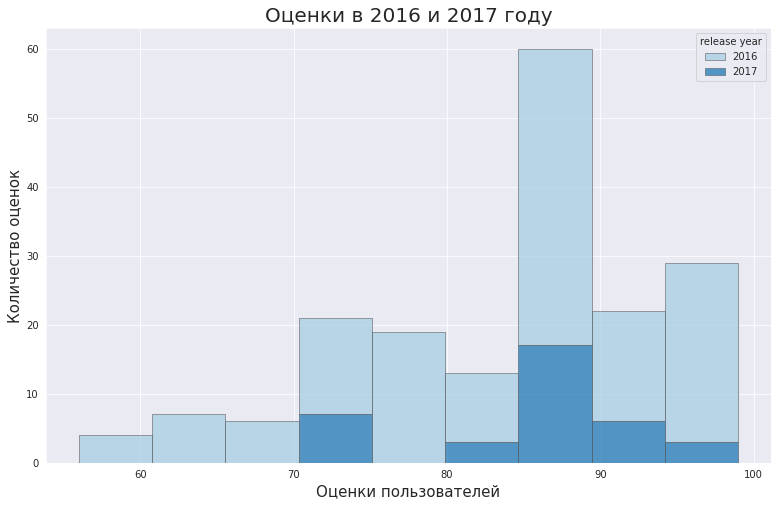

In [ ]:
sns.set_style("darkgrid")
sns.histplot(data_16_17, x="user rating score", hue="release year", multiple="stack",
    palette="Paired",
    edgecolor=".3",
    linewidth=.5)
plt.xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
plt.ylabel('Количество оценок', fontdict={'fontsize': 15, 'fontweight':10})
plt.title('Оценки в 2016 и 2017 году', fontdict={'fontsize': 20, 'fontweight':10})

In [ ]:
data_16_17.groupby('release year').agg({'user rating score': ('mean', 'count')})

user rating score      
                          mean count
release year                        
2016                 83.610345   145
2017                 86.027778    36

In [ ]:
145/36

4.027777777777778

In [ ]:
(86.027778-83.610345) / 88.125000 * 100

2.743186382978726

***Вывод:*** Если формально подойти к ответу, то судя по средней оценке 2017 год был успешнее. Но если взять во внимание тот факт, что за 2016 год было выпущено в 4 раза больше шоу и их средний рейтинг всего на 2.7% ниже рейтинга 2017 года можно сделать вывод, что 2017 год не так уж и хорош. А по сравнению с 2016 годом вообще провален, так как за тот же 2015 год было выпущено больше шоу.

Есть вероятность, что в таблице нет всех шоу за 2017 год, так как этот год послений и не все шоу были добавлены.

## Круговая или столбчатая?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


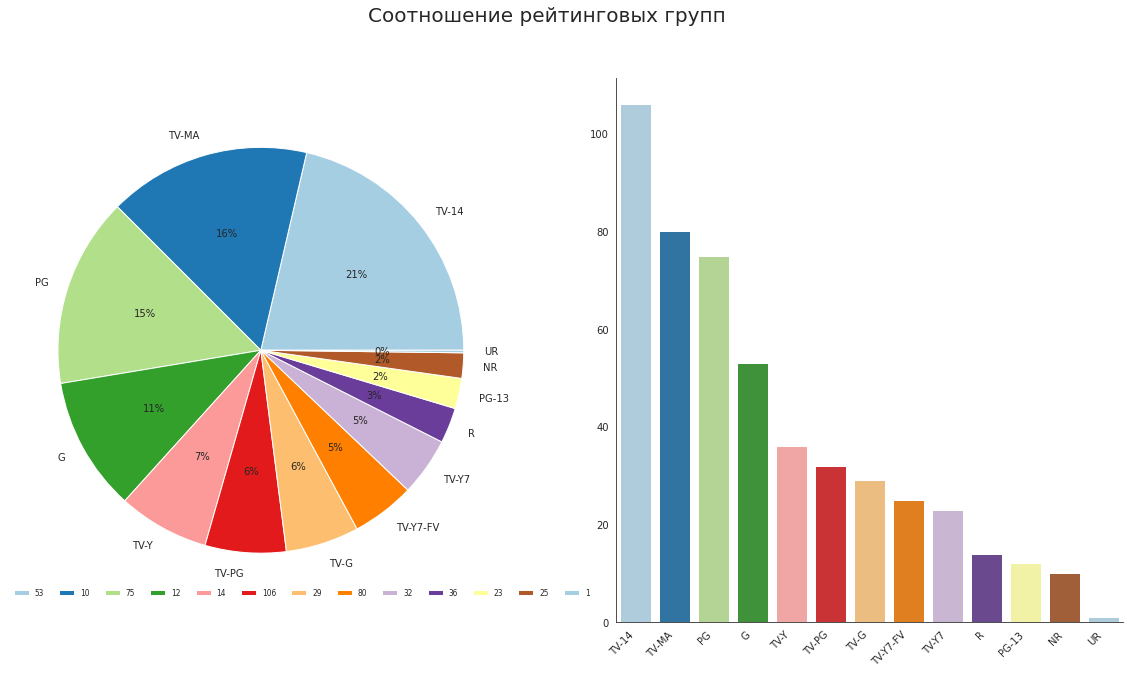

In [ ]:
sns.set_style("white")
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

data.groupby('rating').size().sort_values(ascending=False).plot(kind='pie', autopct='%.0f%%', 
                                                                textprops={'fontsize': 10}, ax=ax[0], colors=sns.color_palette("Paired"))

sns.countplot(data['rating'].sort_values(), palette="Paired", ax=ax[1], order=data['rating'].value_counts().index)

sns.despine();

labels = ax[1].get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax[0].legend(data.groupby('rating').size(), loc='lower left', ncol=13, fontsize=7.5, frameon=False)
ax[0].set_ylabel(None)

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)

fig.suptitle("Соотношение рейтинговых групп", size=20);

In [ ]:
data.groupby('rating').size().sort_values(ascending=False)

rating
TV-14       106
TV-MA        80
PG           75
G            53
TV-Y         36
TV-PG        32
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
dtype: int64

In [ ]:
data['rating'].value_counts().index

Index(['TV-14', 'TV-MA', 'PG', 'G', 'TV-Y', 'TV-PG', 'TV-G', 'TV-Y7-FV',
       'TV-Y7', 'R', 'PG-13', 'NR', 'UR'],
      dtype='object')

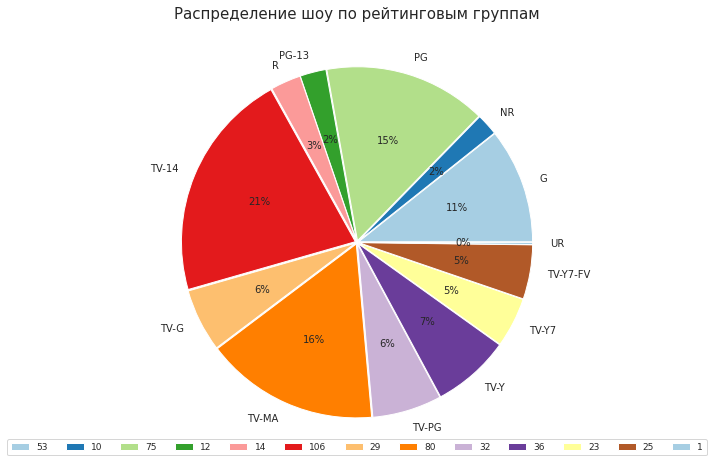

In [ ]:
explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
# plt.pie(data.groupby('rating').size().sort_index(), autopct='%.0f%%', textprops={'fontsize': 10}, colors=sns.color_palette("Paired"), explode = explode)
data.groupby('rating').size().sort_index().plot(kind='pie', autopct='%.0f%%', textprops={'fontsize': 10}, colors=sns.color_palette("Paired"), explode = explode)
plt.legend(data.groupby('rating').size(), loc='lower center', ncol=13, fontsize=9)
plt.title("Распределение шоу по рейтинговым группам", size=15)
plt.ylabel(None);

***Вывод:*** А то, что всего одно шоу группы UR не является выбросом?


## Может еще что найдем

In [122]:
data_full.head()

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,79.0
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0


In [125]:
data_full['ratingLevel'].str.split('.')

0      [crude and sexual humor, language and some dru...
1      [strong violence, sexual content and adult lan...
2      [Parents strongly cautioned,  May be unsuitabl...
3      [Parents strongly cautioned,  May be unsuitabl...
4      [Parental guidance suggested,  May not be suit...
                             ...                        
491                  [some rude humor and sports action]
492        [General Audiences,  Suitable for all ages, ]
493        [General Audiences,  Suitable for all ages, ]
494                            [Suitable for all ages, ]
495                            [Suitable for all ages, ]
Name: ratingLevel, Length: 496, dtype: object

In [135]:
rating_count = data_full.groupby('rating').count()

In [140]:
rating_count[rating_count['title'] != rating_count['ratingLevel']]

,title,ratingLevel,release year,user rating score
rating,,,,
G,53,52,53,53
NR,10,7,10,10
TV-14,106,101,106,106
TV-MA,80,59,80,80
TV-PG,32,30,32,32


G------['General Audiences. Suitable for all ages.' nan]
NR------['This movie has not been rated.' nan]
TV-14------['Parents strongly cautioned. May be unsuitable for children ages 14 and under.'
 nan 'dialogue, language, sexual situations and violence']
TV-MA------['For mature audiences.  May not be suitable for children 17 and under.'
 nan]
TV-PG------['Parental guidance suggested. May not be suitable for all children.' nan]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

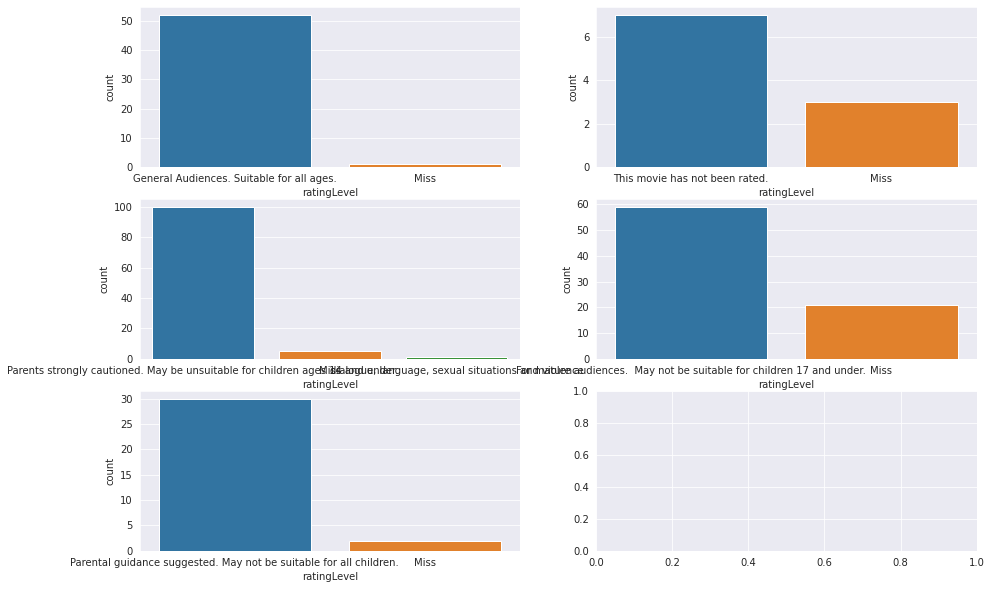

In [202]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for rating in rating_count[rating_count['title'] != rating_count['ratingLevel']].index:
  print(rating, data_full[data_full['rating'] == rating].ratingLevel.unique(), sep='------')
sns.countplot(data_full[data_full['rating'] == 'G'].fillna('Miss')['ratingLevel'], ax=ax[0][0])
sns.countplot(data_full[data_full['rating'] == 'NR'].fillna('Miss')['ratingLevel'], ax=ax[0][1])
sns.countplot(data_full[data_full['rating'] == 'TV-14'].fillna('Miss')['ratingLevel'], ax=ax[1][0])
sns.countplot(data_full[data_full['rating'] == 'TV-MA'].fillna('Miss')['ratingLevel'], ax=ax[1][1])
sns.countplot(data_full[data_full['rating'] == 'TV-PG'].fillna('Miss')['ratingLevel'], ax=ax[2][0])

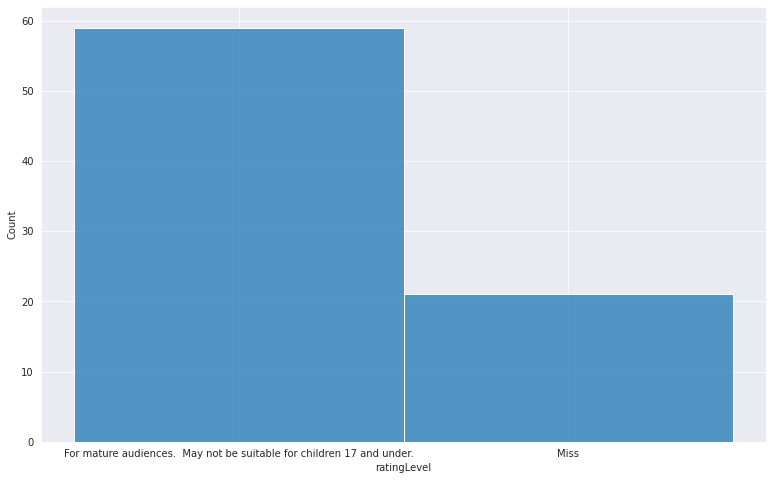

In [161]:
sns.histplot(data_full[data_full['rating'] == 'TV-MA'].fillna('Miss')[''])

## Разбор шоу Sherlok

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
data_full[data_full['release year'] >= 2015].title.values

In [ ]:
Sherlock = data_full[data_full['title'] == 'Sherlock']

In [ ]:
Sherlock

,title,rating,ratingLevel,release year,user rating score
11,Sherlock,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0


In [ ]:
TV_14 = data_full[data_full['rating'] == Sherlock['rating'].values[0]]

In [ ]:
TV_14.reset_index(drop=True, inplace=True)

### Рейтинги шоу внутри группы

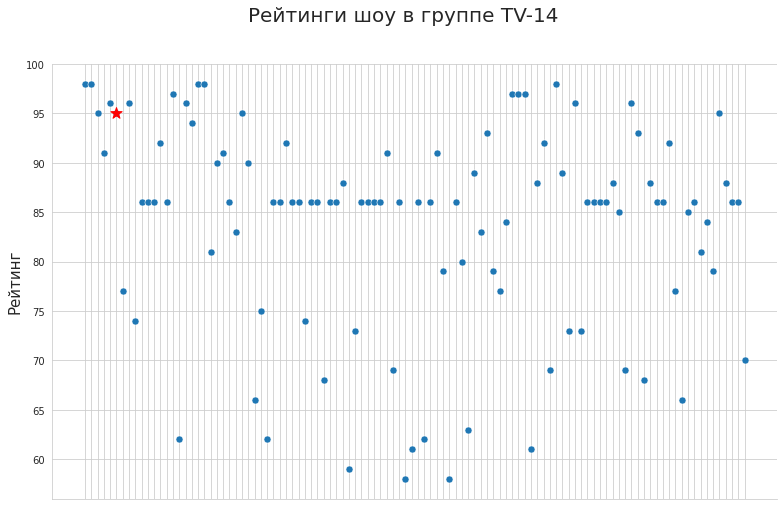

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=TV_14, s=50)
plt.scatter(x='Sherlock', y=Sherlock['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу в группе TV-14", size=20);

### Рейтинги шоу за 2016 год

In [ ]:
data_2016 = data_full[data_full['release year'] == 2016][['title', 'rating', 'user rating score']]

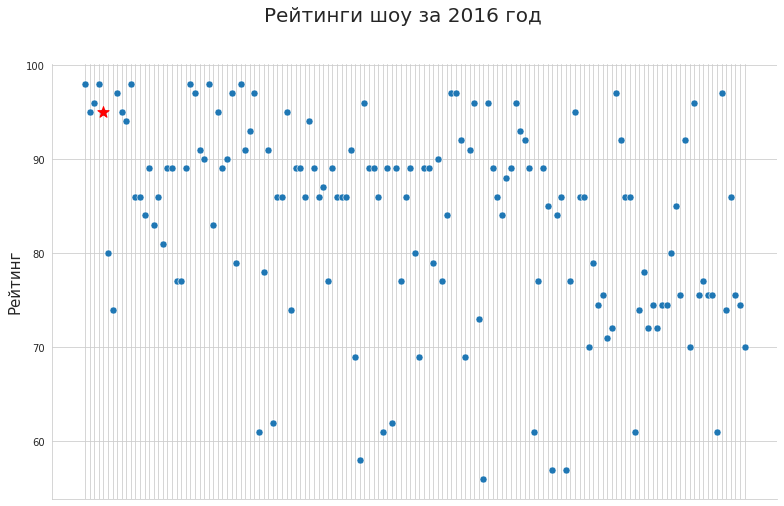

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=data_2016, s=50)
plt.scatter(x='Sherlock', y=Sherlock['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу за 2016 год", size=20);

### Рейтинги шоу за 2016 год в группе TV-14

In [ ]:
TV_14_2016 = data_full[(data_full['rating'] == 'TV-14') & (data_full['release year'] == 2016)]

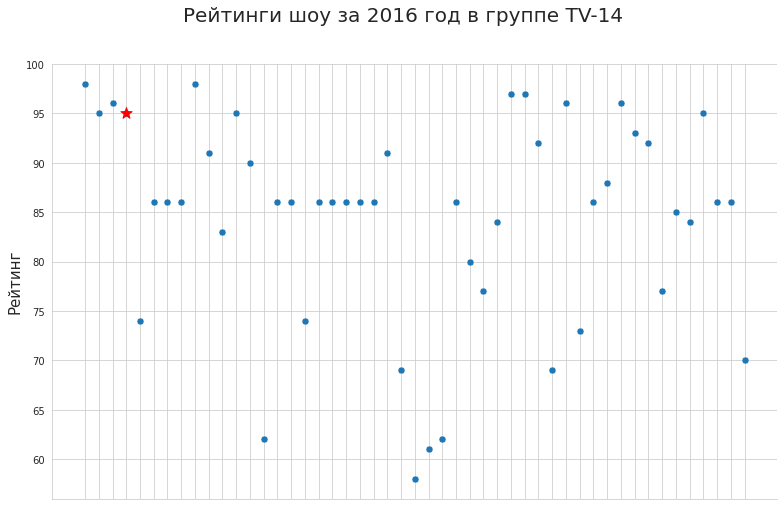

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=TV_14_2016, s=50)
plt.scatter(x='Sherlock', y=Sherlock['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу за 2016 год в группе TV-14", size=20);

### Как проявит себя Scherlock в топовых по рейтингу шоу?

In [ ]:
top_score = data_full[(data_full['user rating score'] >= 90) & (data_full['user rating score'] <= 98)]

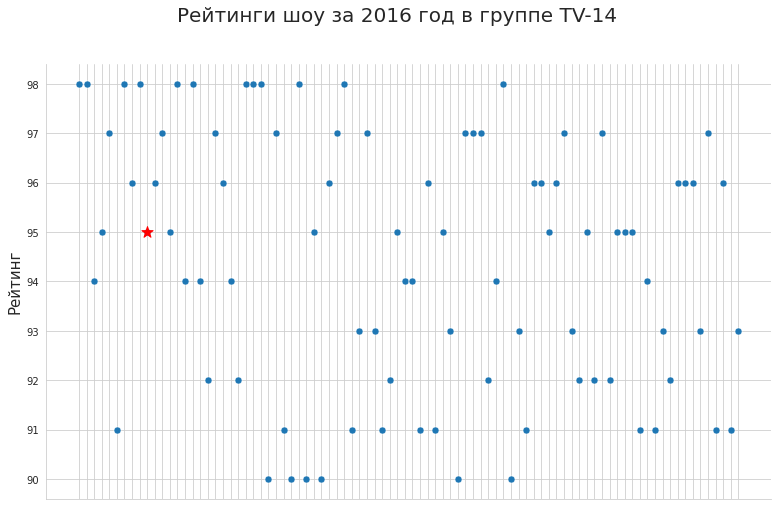

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=top_score, s=50)
plt.scatter(x='Sherlock', y=Sherlock['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу за 2016 год в группе TV-14", size=20);

***Вывод:*** ...

## Разбор шоу Inspector Gadget 2

In [ ]:
data_full[(data_full['user rating score'] >= 65) & (data_full['user rating score'] <= 70) 
& (data_full['release year'] >= 2003) & (data_full['release year'] <= 2008)][['title', 'user rating score', 'release year']]

In [ ]:
Gadget = data_full[data_full['title'] == 'Inspector Gadget 2']

In [ ]:
Gadget

,title,rating,ratingLevel,release year,user rating score
480,Inspector Gadget 2,G,General Audiences. Suitable for all ages.,2003,70.0


### Рейтинги шоу внутри группы

In [ ]:
G_group = data_full[data_full['rating'] == Gadget['rating'].values[0]]

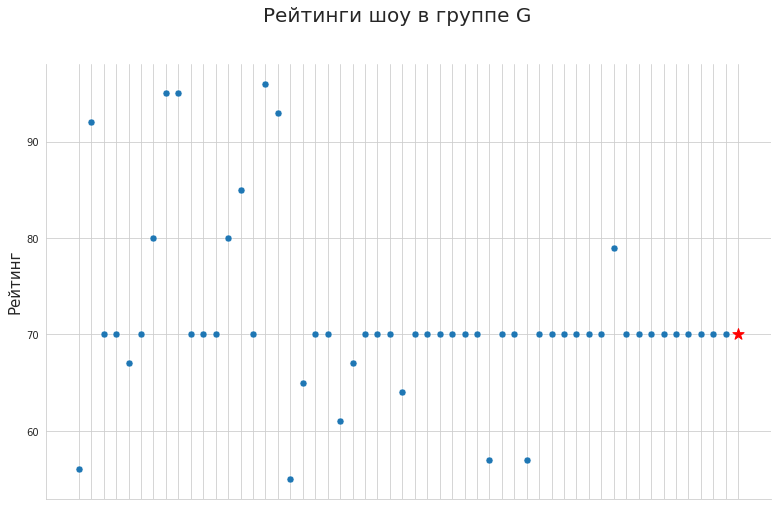

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=G_group, s=50)
plt.scatter(x='Sherlock', y=Gadget['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу в группе G", size=20);

### Рейтинги шоу за 2003 год

In [ ]:
data_2003 = data_full[data_full['release year'] == 2003][['title', 'rating', 'user rating score']]

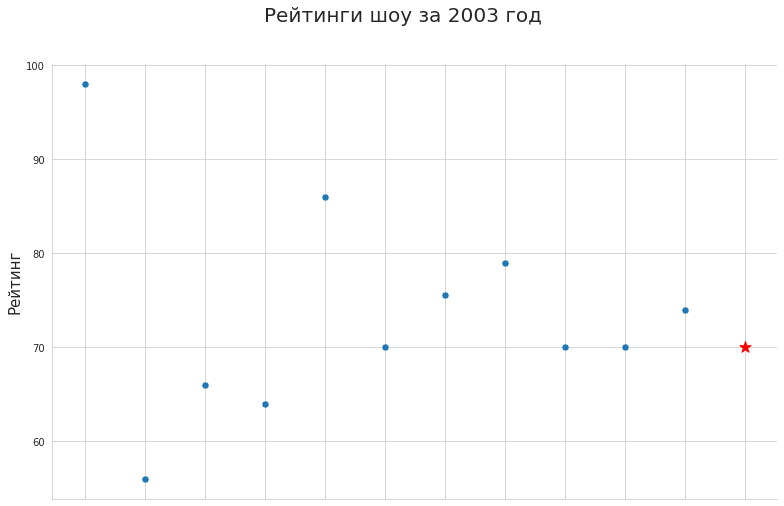

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=data_2003, s=50)
plt.scatter(x='Sherlock', y=Gadget['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу за 2003 год", size=20);

### Рейтинги шоу за 2003 год в группе G

In [ ]:
G_2003 = data_full[(data_full['rating'] == 'G') & (data_full['release year'] == 2003)]

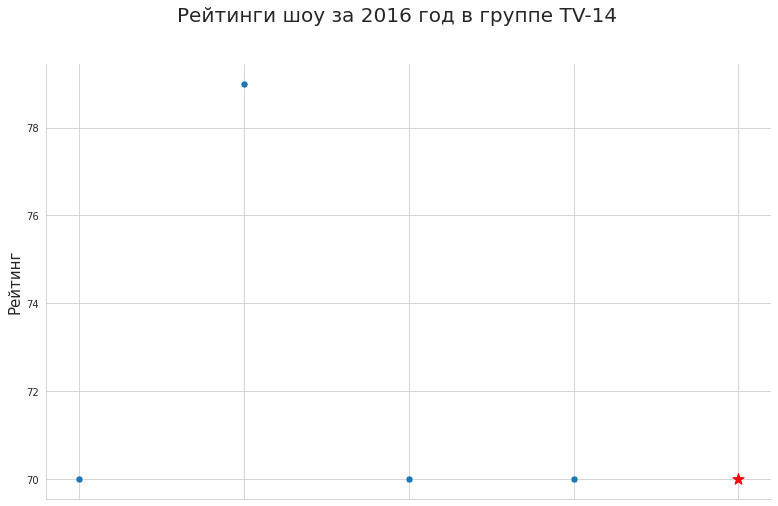

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=G_2003, s=50)
plt.scatter(x='Sherlock', y=Gadget['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу за 2016 год в группе TV-14", size=20);

### Как проявит себя Inspector Gadget 2 в группе со средними оценками от 60 до 75

In [ ]:
middle_score = data_full[(data_full['user rating score'] >= 65) & (data_full['user rating score'] <= 80)]

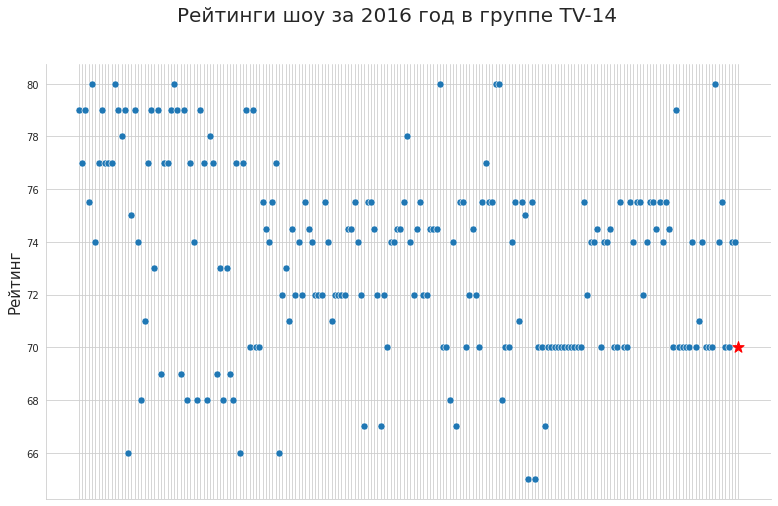

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1)

sns.scatterplot(x='title', y='user rating score', data=middle_score, s=50)
plt.scatter(x='Sherlock', y=Gadget['user rating score'].values[0], color='r', marker='*', s=140)

sns.despine();

ax.set_xticklabels([]);
ax.set_xlabel(None);
ax.set_ylabel("Рейтинг", size=15)

fig.suptitle("Рейтинги шоу за 2016 год в группе TV-14", size=20);

# Попробуем подготовить данные и использовать PCA, посмотрим как данные сгруппируются

In [42]:
data_full

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,79.0
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
491,Russell Madness,PG,some rude humor and sports action,2015,86.0
492,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,70.0
493,Pup Star,G,General Audiences. Suitable for all ages.,2016,70.0
494,Precious Puppies,TV-G,Suitable for all ages.,2003,74.0


## Задали label - title.

In [43]:
data_label = data_full.title
data_data = data_full.drop('title', axis=1)

In [44]:
data_label

0                   White Chicks
1            Lucky Number Slevin
2                 Grey's Anatomy
3                   Prison Break
4          How I Met Your Mother
                 ...            
491              Russell Madness
492    Wiener Dog Internationals
493                     Pup Star
494             Precious Puppies
495                  Beary Tales
Name: title, Length: 496, dtype: object

In [49]:
data_data = pd.get_dummies(data_data)

In [51]:
data_data.shape

(496, 113)

In [52]:
data_label.shape

(496,)

In [53]:
import scipy as sp
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)

In [55]:
pca.fit(data_data)

PCA(n_components=2)

In [57]:
data_data_2D = pca.transform(data_data)

In [59]:
data_data_2D.shape

(496, 2)

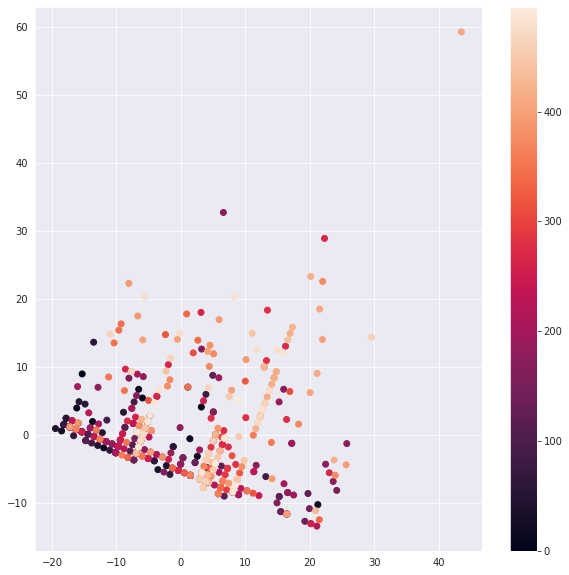

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(data_data_2D[:,0], data_data_2D[:,1], c=data_label.index)
plt.colorbar()
plt.show()

## Попробуем задать rating в качестве label.

In [99]:
data_label = data_full['rating']
data_data = data_full.drop(['title', 'rating'], axis=1)

In [100]:
data_data = pd.get_dummies(data_data)

In [101]:
print(data_label.shape)
print(data_data.shape)

(496,)
(496, 100)


In [102]:
data_label.unique()

array(['PG-13', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-Y', 'NR', 'TV-Y7-FV',
       'UR', 'PG', 'TV-G', 'G', 'TV-Y7'], dtype=object)

In [86]:
data_label

0      PG-13
1          R
2      TV-14
3      TV-14
4      TV-PG
       ...  
491       PG
492        G
493        G
494     TV-G
495     TV-G
Name: rating, Length: 496, dtype: object

In [103]:
def to_num(x):
  d = dict(zip(data_label['rating'].unique(), range(1, 14)))
  return d[x]

In [104]:
data_label = pd.DataFrame(data_label)

In [105]:
data_label['num'] = data_label['rating'].apply(to_num)

In [106]:
data_label.head()

,rating,num
0,PG-13,1
1,R,2
2,TV-14,3
3,TV-14,3
4,TV-PG,4


In [107]:
pca = PCA(n_components=2)

In [108]:
pca.fit(data_data)

PCA(n_components=2)

In [109]:
data_data_2D = pca.transform(data_data)

In [110]:
data_data_2D.shape

(496, 2)

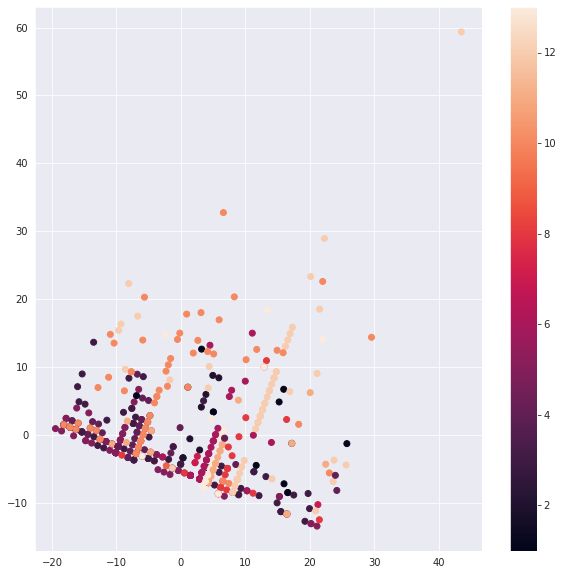

In [112]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(data_data_2D[:,0], data_data_2D[:,1], c=data_label['num'])
plt.colorbar()
plt.show()

In [120]:
dict(zip(data_label['rating'].unique(), range(1, 14)))

{'G': 12,
 'NR': 7,
 'PG': 10,
 'PG-13': 1,
 'R': 2,
 'TV-14': 3,
 'TV-G': 11,
 'TV-MA': 5,
 'TV-PG': 4,
 'TV-Y': 6,
 'TV-Y7': 13,
 'TV-Y7-FV': 8,
 'UR': 9}